# Algorithms time complexities

In [1]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
arr = [6, 8, 3, 5, 9, 1, 4, 7, 10, 2]

In [3]:
complexities = dict()

## $O(1)$: constant time

A constant time algorithm has a complexity that does not depend on the size of the input.

Examples:
- accessing any single element in an array
- finding the minimal value in an array sorted in ascending order

In [4]:
def increment(n):
    n += 1

In [5]:
complexities["O(1)"] = %timeit -o increment(1)

84.9 ns ± 3.94 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## $O(\log n)$: logarithmic time

A logarithmic time algorithm is considered highly efficient. It performs a number of operations proportional to the logarithm of the input size $n$.

The ratio of operations to input size $n$ with $n \rightarrow +\infty$ is $\frac{\log n}{n} = 0$. This means that as the input grows, the number of operations per input element shrinks toward $0$.

Examples:
- operations on binary trees
- binary search

In [6]:
def binary_search(array, target):
    left = 0
    right = len(array) - 1
    while left <= right:
        middle = left + math.floor((right - left) / 2)
        if array[middle] < target:
            left = middle + 1
        elif array[middle] > target:
            right = middle - 1
        else:
            return middle
    return -1

In [7]:
ordered_arr = sorted(arr)
ordered_arr

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
complexities["O(log(n))"] = %timeit -o binary_search(ordered_arr, 10)

997 ns ± 22.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## $O(\sqrt n)$: square root time

Algorithm with this time complexity are uncommon compared to linear or logarithmic ones. Typically they appear in some clever optimizations or mathematical algorithms.

This algorithms are faster than linear time algorithms but slower than logarithmic algorithms.

Examples:
- primality testing: check if a number $n$ is prime

In [9]:
def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    for i in range(2, math.ceil(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

In [10]:
complexities["O(sqrt(n))"] = %timeit -o is_prime(179)

1.4 μs ± 50.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## $O(n)$: linear time

A linear time algorithm has a complexity that increases at most linearly with the size of the input. Thus, there is a constant $c$ such that the running time is at most $c \cdot n$ for every input size $n$.

Examples:
- search of an element in an unordered list
- sum of all the elements in a list

In [11]:
def linear(n):
    sum = 0
    for i in range(n):
        sum += 1

In [12]:
complexities["O(n)"] = %timeit -o linear(100)

3.28 μs ± 128 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## $O(n \log n)$: linearithmic (or log-linear) time

In many cases, a log-linear algorithm performs $O(\log n)$ operations $n$ times.

Examples:
- Mergesort algorithm that orders a list
- Quicksort algorithm that orders a list

In [13]:
def mergesort(array):
    if len(array) <= 1:
        return array
    
    middle = len(array) // 2
    left_array = mergesort(array[:middle]) # subarray with elements [0, middle)
    right_array = mergesort(array[middle:]) # subarray with elements [middle, n]
    return merge(left_array, right_array)

def merge(left, right):
    result = []
    i = 0
    j = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    # attach the remaining elements of left starting from i to result
    result.extend(left[i:])
    # attach the remaining elements of right starting from j to result
    result.extend(right[j:])
    return result

In [14]:
complexities["O(n*log(n))"] = %timeit -o mergesort(arr)

17.3 μs ± 625 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## $O(n^k)$: polynomial time

An algorithm is said to be of **polynomial time** if its running time is **upper bounded** by a polynomial expression in the size of the input for the algorithm, that is $O(n^k)$ for some positive constant $k$.

Problems for which a deterministic polynomial-time algorithm exists belong to the **complexity class P**.

A problem is in the **complexity class NP** if a solution can be **verified** in polynomial time, even if finding that solution may take more than polynomial time. An example of a problem that is in **NP** is the TSP: a solution for this problem can be checked in polynomial time, but finding a solution is hard (the time complexity of a dynamic programming algorithm that solves TSP is $O(2^n)$).

## $O(n^2)$: quadratic time

A quadratic time algorithm is a polynomial time algorithm with $k = 2$.

Examples:
- Bubble sort algorithm that orders a list
- Insertion sort algorithm that orders a list

In [15]:
def quadratic(n):
    sum = 0
    for i in range(n):
        for j in range(n):
            sum += 1

In [16]:
complexities["O(n^2)"] = %timeit -o quadratic(100)

555 μs ± 11.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## $O(n^{3})$: cubic time

A cubic time algorithm is a polynomial time algorithm with $k = 3$.

Examples:
- naive matrix multiplication
- Floyd-Warshall algorithm used in graph theory for finding the shortest path between every pair of vertices

In [17]:
def cubic(n):
    sum = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                sum += 1

In [18]:
complexities["O(n^3)"] = %timeit -o cubic(100)

61 ms ± 6.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## $O(2^{n})$: exponential time

An exponential time algorithm has a complexity that grows exponentially with the size of the input $n$.

These are typically algorithms that generate and check all possible **combinations** (the order does not matter) of the input (subsets, assignments, paths, etc).

An algorithm with this time complexity becomes unusable around $n \approx 30$.

Examples:
- naive algorithm for finding the n-th number in the Fibonacci sequence
- solving TSP (Traveling Salesman Problem) using dynamic programming
- 0/1 Knapsack with brute-force search

In [19]:
def fibonacci(n):
    if n < 0:
        return -1
    elif n < 2:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

In [20]:
complexities["O(2^n)"] = %timeit -o fibonacci(30)

350 ms ± 46.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## $O({n!})$: factorial time

An algorithm is said to be of factorial time if its running time is upper bound by the factorial function $n!$.

These are typically algorithms that generate all possible permutations (the order matters) of the input (subsets, assignments, paths, etc).

An algorithm with this time complexity becomes unusable around $n \approx 10$.

Examples:
- finding all possible permutations of a sequence
- solving TSP (Traveling Salesman Problem) using brute-force search
- solving the Hamiltonian Cycle Problem using brute-force search

In [21]:
def permutate(array):
    if len(array) == 1:
        return [array]

    perms = []

    for i, e1 in enumerate(array):
        selected = [e1]
        head = array[:i]
        tail = array[i+1:]
        rest = head + tail
        remaining = permutate(rest)
        for j, e2 in enumerate(remaining):
            perm = selected + e2
            perms.append(perm)
    return perms

In [22]:
complexities["O(n!)"] = %timeit -o permutate([1, 2, 3, 4, 5, 6, 7, 8, 9])

1.58 s ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## $O(2^{2^{n}})$: double exponential time

A double exponential time algorithm has a complexity that grows far beyond the exponential time complexity and factorial time complexity.

An algorithm with this time complexity becomes unusable for even a small $n \approx 5$. Only a very small input can be handled.

Examples:
- theoretical problems in logic and formal verification, automata theory, AI planning

In [23]:
def double_exponential(n):
    iterations = 2 ** (2 ** n)
    sum = 0
    for i in range(0, iterations):
        sum += 1

In [24]:
complexities["O(2^(2^n))"] = %timeit -r 1 -n 1 -o double_exponential(5)

6min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Summary

In [25]:
complexities_data = [(complexity, time.average, str(time).split("per")[0].strip()) for complexity, time in complexities.items()]

In [26]:
complexities_df = pd.DataFrame(data=complexities_data, columns=['Complexity', 'Execution time', 'Execution time summary (mean ± std. dev.)'])

In [27]:
complexities_df

,Complexity,Execution time,Execution time summary (mean ± std. dev.)
0,O(1),8.489641e-08,84.9 ns ± 3.94 ns
1,O(log(n)),9.967909e-07,997 ns ± 22.4 ns
2,O(sqrt(n)),1.395984e-06,1.4 μs ± 50.6 ns
3,O(n),3.283891e-06,3.28 μs ± 128 ns
4,O(n*log(n)),1.726711e-05,17.3 μs ± 625 ns
5,O(n^2),5.553648e-04,555 μs ± 11.4 μs
6,O(n^3),6.100364e-02,61 ms ± 6.96 ms
7,O(2^n),3.497604e-01,350 ms ± 46.6 ms
8,O(n!),1.581772e+00,1.58 s ± 153 ms
9,O(2^(2^n)),4.045723e+02,6min 44s ± 0 ns


<Axes: xlabel='Complexity'>

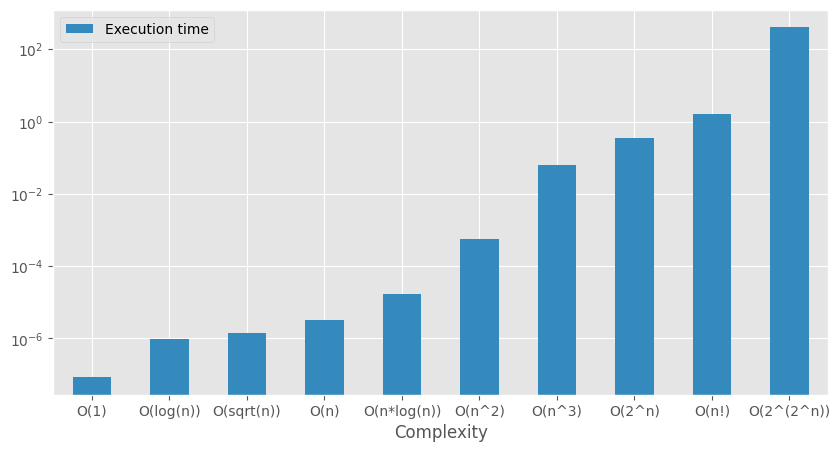

In [28]:
complexities_df.plot(kind="bar", x="Complexity", y="Execution time", rot=0, color="C1", logy=True, figsize=(10, 5))